# Project heat equation

Please fill in the names of the team mebers.

<div class="alert alert-block alert-danger">

<b>Team: XX</b>
- Max Mustermann 471108 
- XX
- XX

<b>Result:</b>

| Task   |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  Sum  |
|--------|-----|-----|-----|-----|-----|-----|-----|-------|
| Points | ?/2 | ?/2 | ?/4 | ?/2 | ?/2 | ?/4 | ?/4 | ??/20 |

</div>

## Packages

<div class="alert alert-block alert-danger">
    
<b>Important: Do not import other packages or libraries!</b>
    
</div>

### Python

In [3]:
from platform import python_version
print('python version = '+ python_version())

python version = 3.9.7


### Display images and videos

In [4]:
from IPython.display import HTML, Image, IFrame, YouTubeVideo

### NumPy

In [5]:
import numpy as np
print('numpy version = '+ np.__version__)

numpy version = 1.20.3


### Matplotlib

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
print('matplotlib version = '+ matplotlib.__version__)

matplotlib version = 3.4.3


### Google Colab
If you are using Google Colab mount drive and change directory.

In [7]:
if 'google.colab' in str(get_ipython()):
    print('Running on Google Colab')
    from google.colab import drive
    drive.mount('/content/gdrive')
    %cd '/content/gdrive/MyDrive/Colab Notebooks/Modelling and Simulation/robot'
else:
    print('Not running on Google Colab')

Not running on Google Colab


## 1 Modelling


Thermal conduction is something we all have experienced in many ways. Whether it be good thermal conduction like a cooking pan on a stove, or bad thermal conduction when wearing a jacket. Like mentioned the way a material is used can depend on the termal conduction of said material. Especially in the ever growing use of CPUs and GPUs efficient thermal conduction plays an important role, to ensure performance and longevity of CPUs and GPUs.

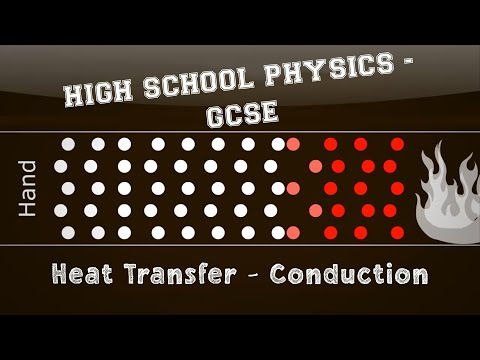

In [8]:
YouTubeVideo('9joLYfayee8')

In this project we focus on the thermal conduction of solid materials in the 1D (MAYBE 2D???) particel model. The solid material will be heated from one side. Through thermal conduction the heat will be transfered. The reason for that is the particels begin to move, upon being exposed to heat. This movement of the particels that are exposed to heat will result in crashed with still standing particels. These crashes also produce heat and that is how the heat will be transfered through the solid material.


In [9]:
Image('', width=300, height=150)
Inserting image of a particel model!!!

SyntaxError: invalid syntax (Temp/ipykernel_30072/800063295.py, line 2)

## 2 Derivation of the heat equation

The law of conservation of energy is the basis of the heat equation, which states that energy is not lost or created, but merely transformed from one form to another. Mathematically it looks like this:

Above should be the introduction to the heat equation. In the end the thing that we work with looks like this: 
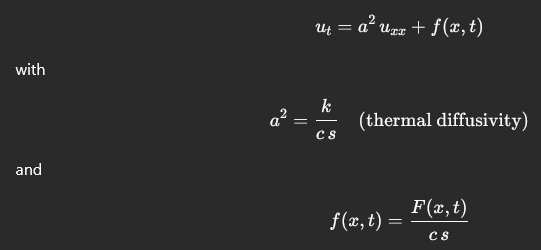
u_t = a²*u_xx + f(x,t)

Now comes the calculation of a² with the help of wikipedia articles, where the students should extract the important information and then calculate a² (Thermal diffusivity, in German: Temparturleitfähigkeit)

k: https://en.wikipedia.org/wiki/List_of_thermal_conductivities

## 3 Thermal diffusivity


<div class="alert alert-block alert-info">
    
### Task 1:  <font color=red>(2 points)</font>



</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 1</b>


    
</div>

In [ ]:
# Solution of Task 1


## 4 Thermal conduction without heat source

<div class="alert alert-block alert-info">
    
### Task 2:  <font color=red>(2 points)</font>

</div>

<div class="alert alert-block alert-success">
    
<b>Solution of Task 2</b>

</div>

In [ ]:
# Solution of Task 2


## 5 Thermal conduction with heat source

<div class="alert alert-block alert-info">
    
### Task 3:  <font color=red>(4 points)</font>


</div>

<div class="alert alert-block alert-success">

<b>Solution of task 3</b>

</div>

In [ ]:
# Solution of Task 3


<div class="alert alert-block alert-info">
    
### Task 4:  <font color=red>(2 points)</font>

    
</div>

<div class="alert alert-block alert-success">

<b>Solution of Task 4</b>
    

</div>

In [ ]:
# Solution of Task 4


<div class="alert alert-block alert-info">
    
### Task 5:  <font color=red>(2 points)</font>

</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 5</b>


</div>

In [ ]:
# Solution of Task 5


<div class="alert alert-block alert-info">
    
### Task 6:  <font color=red>(4 points)</font>


</div>

<div class="alert alert-block alert-success">

<b>Solution of task 6</b>

</div>

In [ ]:
# Solution of Task 6


## 6 Visualization


In [10]:
# --------------------
# Parameters
# --------------------
a = 1.0          # thermal diffusivity
N = 10           # number of Fourier terms
L = math.pi      # rod length (x in [0, π])
nx = 300         # spatial resolution
panel_h = 80     # height of the color panel
dt_ms = 1        # time step in milliseconds for the animation
t_end = 2000     # total duration in milliseconds (e.g. 2000 ms = 2 s)

x_vals = np.linspace(0, L, nx)
t_vals = np.arange(0, t_end + dt_ms, dt_ms) / 1000.0  # convert ms → s

# --------------------
# Solution u(x,t) as Fourier series
# --------------------
def u_xt(x, t, N, a):
    s = 0.0
    for k in range(1, N + 1):
        numerator = 2 * (1 - math.cos(k * math.pi)) * math.sin(k * x)
        denominator = math.pi * k
        exponent = -t * (a ** 2) * (k ** 2)
        s += (numerator / denominator) * math.exp(exponent)
    return s

# Precompute all values (for stability and consistent color range)
U = np.zeros((len(t_vals), len(x_vals)))
for i_t, t in enumerate(t_vals):
    for i_x, x in enumerate(x_vals):
        U[i_t, i_x] = u_xt(x, t, N, a)

U_min, U_max = np.min(U), np.max(U)

# --------------------
# "Thermal camera" visualization
# --------------------
fig, ax = plt.subplots(figsize=(9, 3.8))

# Initial frame
panel0 = np.repeat(U[0][None, :], panel_h, axis=0)
im = ax.imshow(
    panel0,
    aspect='auto',
    extent=[x_vals[0], x_vals[-1], 0, 1],
    vmin=U_min, vmax=U_max,
    cmap='inferno'  # thermal-style color palette
)

cbar = plt.colorbar(im, ax=ax, label="Temperature u(x,t)")
ax.set_xlabel("x (Position)")
ax.set_yticks([])  # hide vertical axis (for flat color panel)
time_text = ax.text(0.02, 0.92, "", transform=ax.transAxes, fontsize=10)

# --------------------
# Animate fewer frames to reduce file size
# --------------------
frame_step = 5                  # take every 5th frame for animation
frame_indices = range(0, len(t_vals), frame_step)

def update(frame_index):
    panel = np.repeat(U[frame_index][None, :], panel_h, axis=0)
    im.set_data(panel)
    time_text.set_text(f"t = {t_vals[frame_index]*1000:.0f} ms")
    return (im, time_text)

anim = FuncAnimation(
    fig,
    update,
    frames=frame_indices,
    interval=dt_ms * frame_step,  # keep correct real-time spacing
    blit=True
)

plt.close(fig)  # prevent duplicate static image in Jupyter
HTML(anim.to_jshtml())  # render animation with JS controls


## 7 Evaluation


## 8 Embedding

<div class="alert alert-block alert-info">
    
### Task 7: Video <font color=red>(4 points)</font>


</div>

<div class="alert alert-block alert-success">
    
<b>Solution of task 7</b>


</div>

In [ ]:
# Solution of Task 7


## Literature
 - [J.Koch, M.Stämpfle: Mathematik für das Ingenieurstudium](https://www.hanser-fachbuch.de/buch/Mathematik+fuer+das+Ingenieurstudium/9783446451667)
 - [https://en.wikipedia.org/wiki/Industrial_robot](https://en.wikipedia.org/wiki/Industrial_robot)
 - [https://www.kuka.com](https://www.kuka.com/)